# Importing Library:

In [52]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [53]:
# Pandas read_csv function used for reading the csv file.
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
# total no of rows and columns
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 614
No of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [56]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

In [57]:
# Duplicate entry or duplicate row with same value exist
df.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


loan application status dataset we have 614 rows with 13 columns including target variable.

Target Variable is 'Loan_Status' having object datatype and It is categorical variable.

Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.



#### Missing value check

<AxesSubplot:>

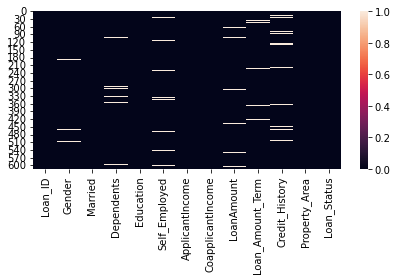

In [59]:
# checking the null values with heatmap
sns.heatmap(df.isnull())

In [60]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


7 out 13 columns contains missing value.



## Exploring categorial features

In [61]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('*'*40)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
****************************************
Married
Yes    398
No     213
Name: Married, dtype: int64
****************************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
****************************************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
****************************************
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
******

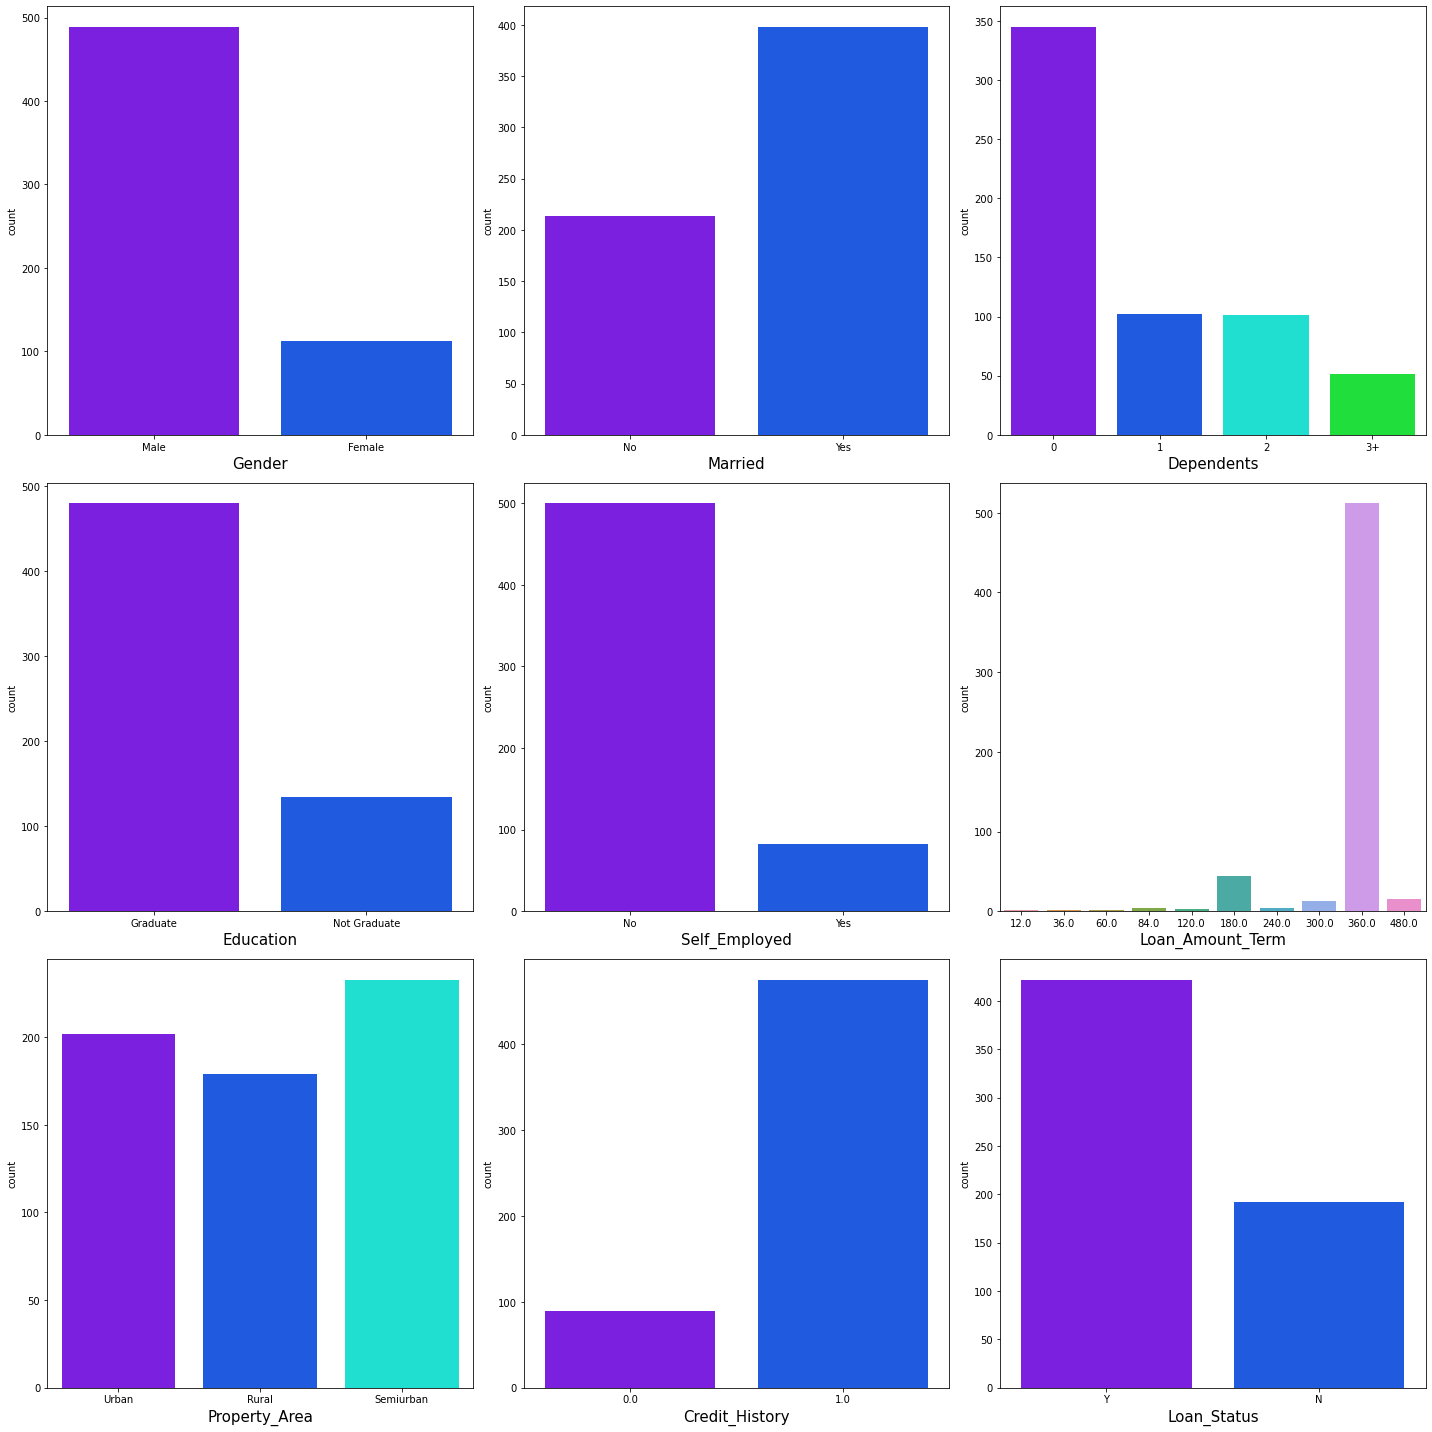

In [62]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

Out of Total loan application 80 % applicants are Male. 

Only 20% applicants are self employed.

70% are married and 75% of loan applicants are graduates

60% of the applicants have no dependents.

80% people previously have credit history.

70 % applicant gets loan approved.

## Missing value imputation

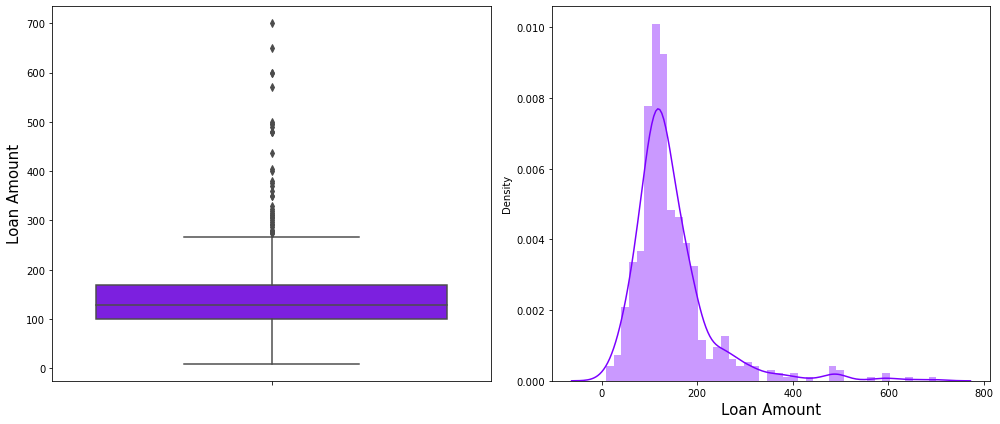

In [63]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df)
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'])
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [64]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


The mean is greater than median loan amount.



Missing values in Loan amount is impute with median value.

Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.

Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [65]:
#  Mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [66]:
# percentage of data is missing 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


## Statistical Matrix

In [67]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

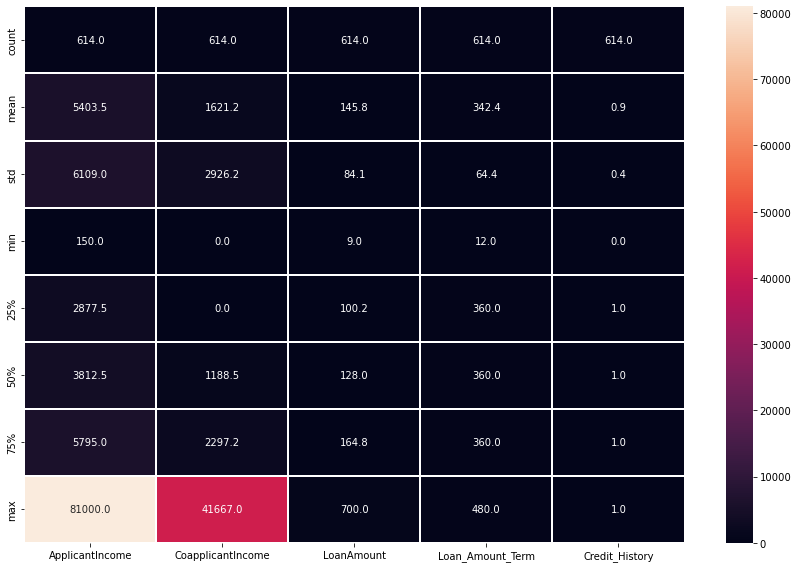

In [68]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.



# Exploratory Data Analysis

### Target Variable

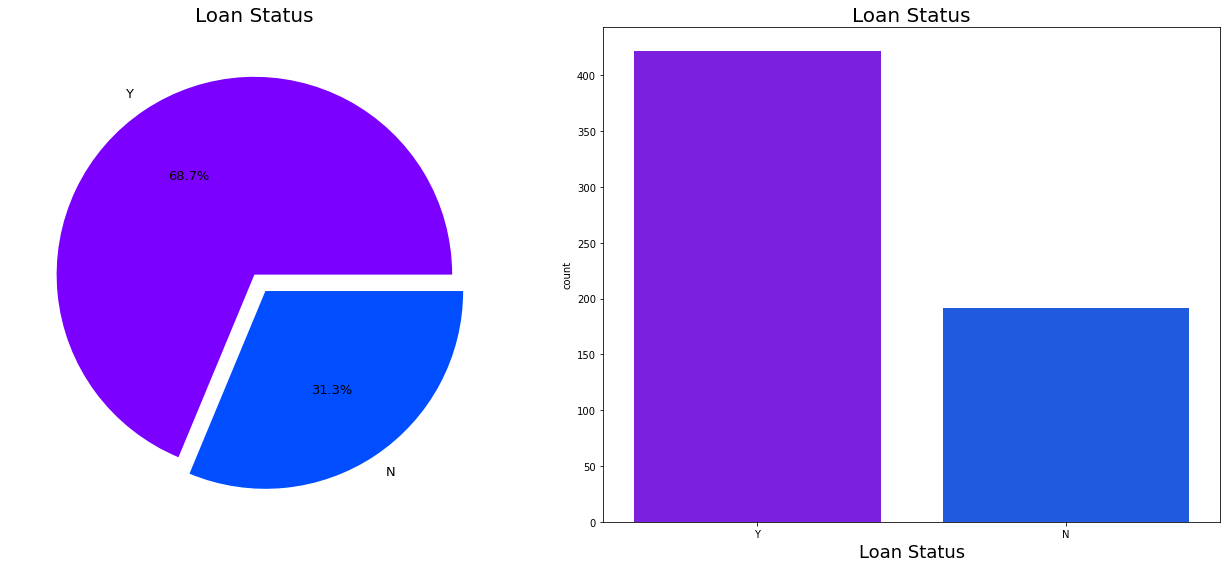

In [69]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0])
ax[0].set_title('Loan Status', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20)
ax[1].set_xlabel("Loan Status",fontsize=18)
plt.show()

68.7% Applicants gets loan Approval.

Dataset is imbalanced in nature.

### Gender Vs Loan Status

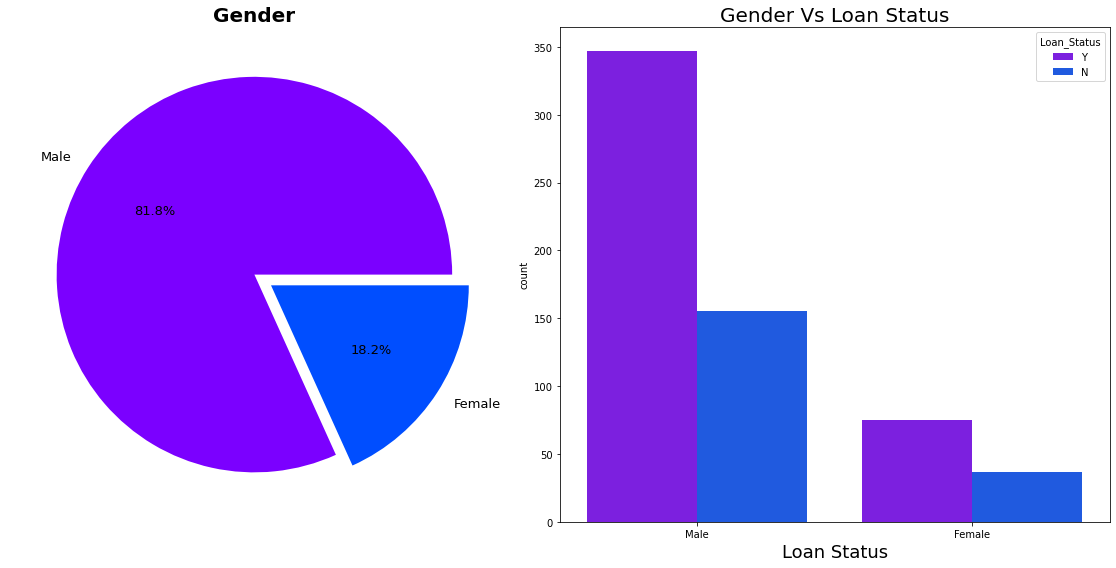

In [70]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={'fontsize':13}, ax=ax[0])
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20)
ax[1].set_xlabel("Loan Status",fontsize=18)
plt.tight_layout()
plt.show()

In [71]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


81.8% Applicant are male.

Irrespective Gender 65 % Applicant from each gender gets loan approval.

### Married Vs Loan Status

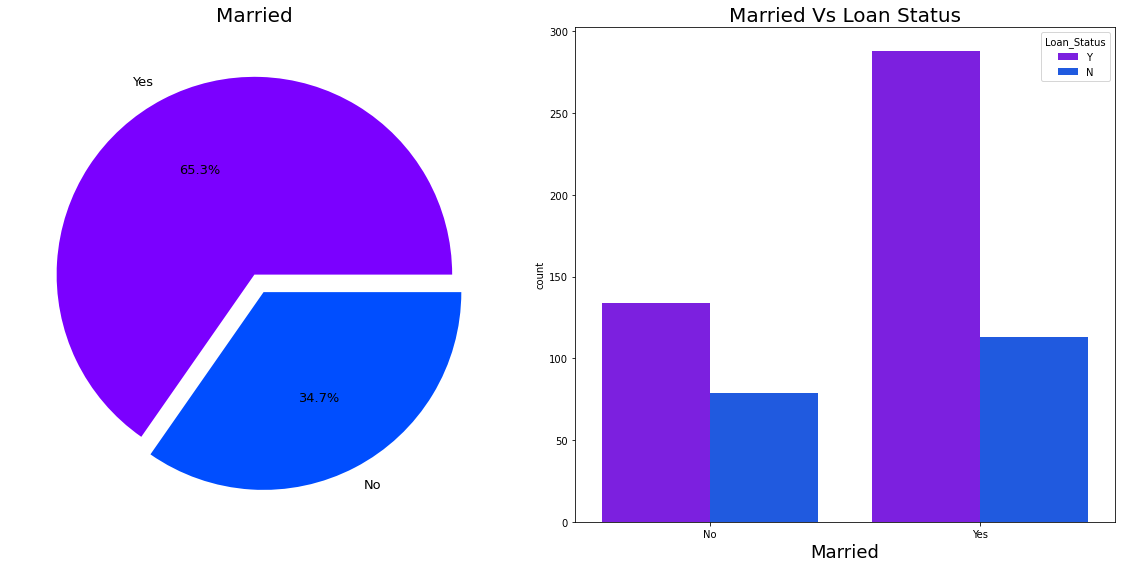

In [72]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={'fontsize':13}, ax=ax[0])
ax[0].set_title('Married', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20)
ax[1].set_xlabel("Married",fontsize=18)
plt.show()

In [73]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True)

Loan_Status       N    Y  All
Gender Married               
Female No        29   51   80
       Yes        8   24   32
Male   No        50   83  133
       Yes      105  264  369
All             192  422  614

65.3 % loan applicants are married. We can see from Count plot that Married people have more possibility of getting loan approval.



### Number of dependents 

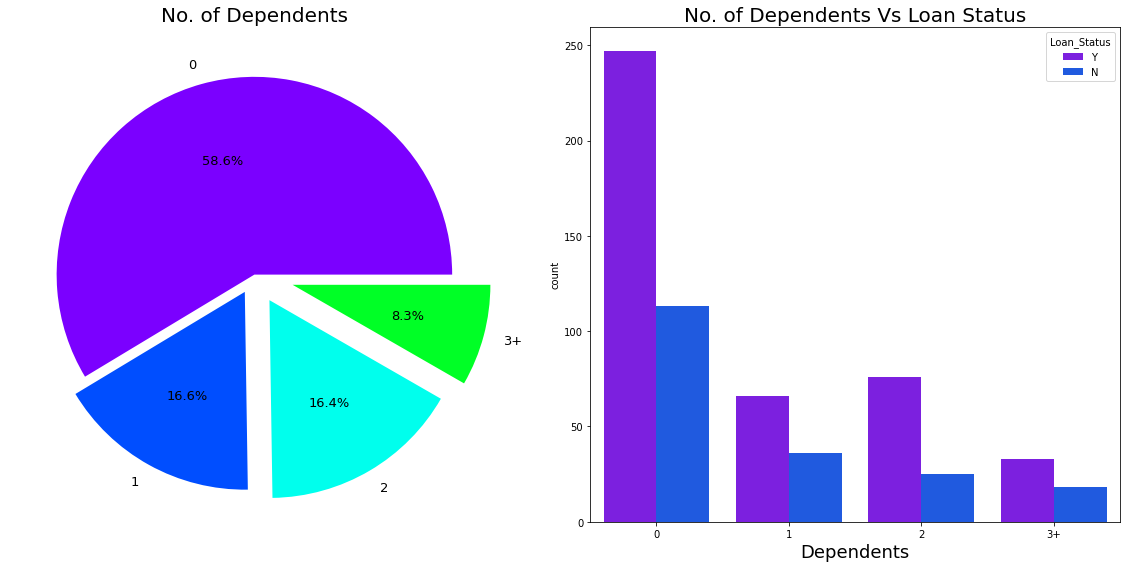

In [74]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={'fontsize':13}, ax=ax[0])
ax[0].set_title('No. of Dependents', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20)
ax[1].set_xlabel("Dependents",fontsize=18)
plt.show()

In [75]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True)

Loan_Status      N           Y       All
Gender      Female Male Female Male     
Dependents                              
0               27   86     56  191  360
1                6   30     13   53  102
2                2   23      5   71  101
3+               2   16      1   32   51
All             37  155     75  347  614

In [76]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

In [77]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True)

Loan_Status      N           Y       All
Gender      Female Male Female Male     
Dependents                              
0               27   86     56  191  360
1                6   30     13   53  102
2                2   23      5   71  101
3+               2   16      1   32   51
All             37  155     75  347  614

58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents.

Female having zero dependents have more chances to get loan approval compare to Females with dependents.

Male Maximum loan approval comes with 0 dependents followed by 2 dependents.

### Education Vs Loan status

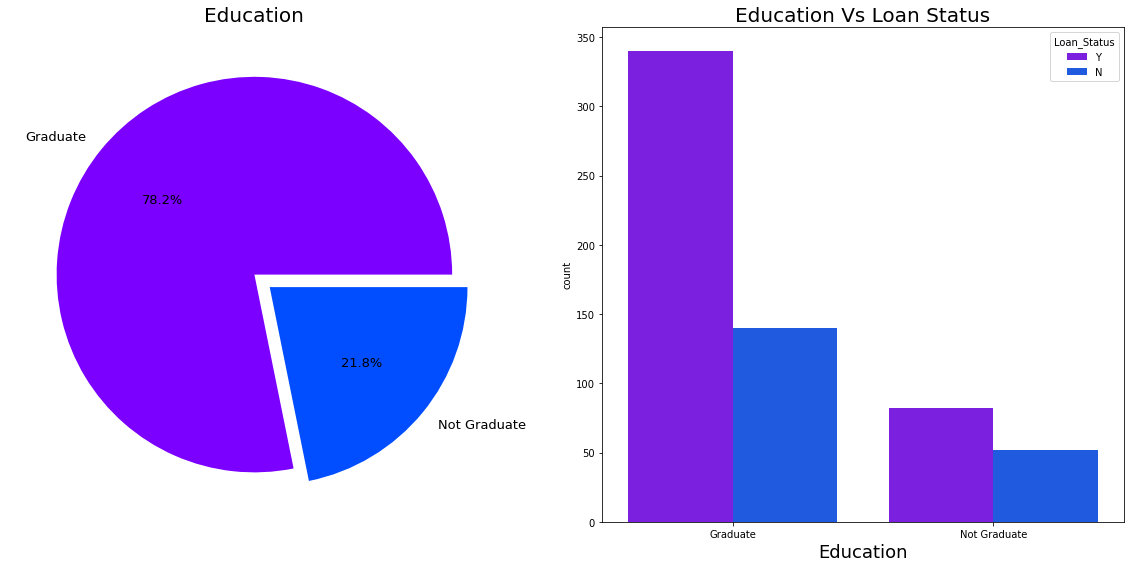

In [78]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={'fontsize':13}, ax=ax[0])
ax[0].set_title('Education', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20)
ax[1].set_xlabel("Education",fontsize=18)
plt.show()


In [79]:
  pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status            N    Y  All
Education    Gender               
Graduate     Female   31   61   92
             Male    109  279  388
Not Graduate Female    6   14   20
             Male     46   68  114
All                  192  422  614

Graduate applicants are more likely to get loan approval irrespective gender.

# Encoding categorical data

In [80]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [81]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature Engineering

In [82]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

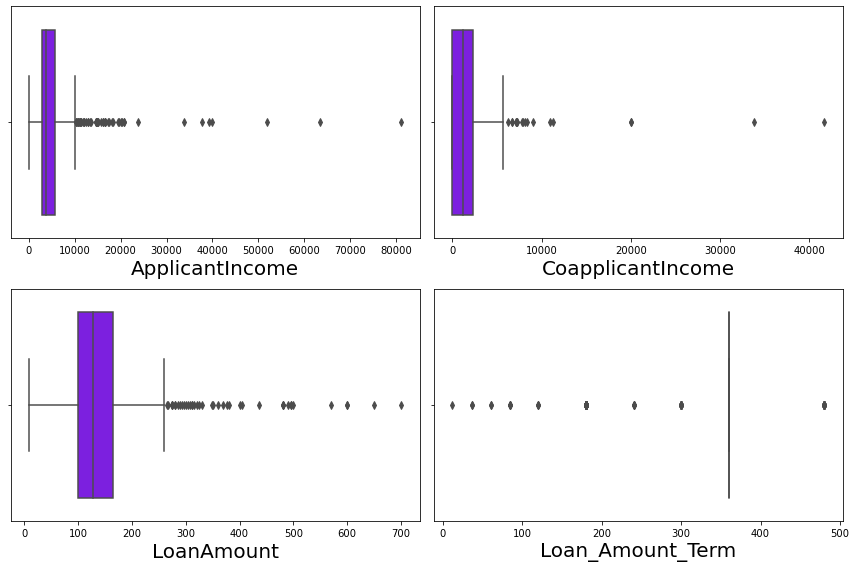

In [83]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [84]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [85]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [86]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [87]:
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [88]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 6.03%
With threshold 3.01 data loss is 6.03%
With threshold 3.02 data loss is 5.86%
With threshold 3.03 data loss is 5.7%
With threshold 3.04 data loss is 5.7%
With threshold 3.05 data loss is 5.7%
With threshold 3.06 data loss is 5.7%
With threshold 3.07 data loss is 5.7%
With threshold 3.08 data loss is 5.7%
With threshold 3.09 data loss is 5.54%
With threshold 3.1 data loss is 5.54%
With threshold 3.11 data loss is 5.54%
With threshold 3.12 data loss is 5.54%
With threshold 3.13 data loss is 5.54%
With threshold 3.14 data loss is 5.54%
With threshold 3.15 data loss is 5.54%
With threshold 3.16 data loss is 5.54%
With threshold 3.17 data loss is 5.54%
With threshold 3.18 data loss is 5.54%
With threshold 3.19 data loss is 5.54%
With threshold 3.2 data loss is 5.37%
With threshold 3.21 data loss is 5.37%
With threshold 3.22 data loss is 5.37%
With threshold 3.23 data loss is 5.37%
With threshold 3.24 data loss is 5.37%
With threshold 3.25 data loss is 5

In [89]:
threshold = 3.5
df1 = df[(z<3.5).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (585, 12)
Percentage of data loss post outlier removal:  4.723127035830619


### Skewness

In [90]:
df.skew()

Gender              -1.644689
Married             -0.636519
Dependents           1.044111
Education            1.316088
Self_Employed        2.229920
ApplicantIncome      2.269125
CoapplicantIncome    1.535617
LoanAmount           1.424895
Loan_Amount_Term    -2.157886
Credit_History      -1.998786
Property_Area       -0.051356
Loan_Status         -0.835477
dtype: float64

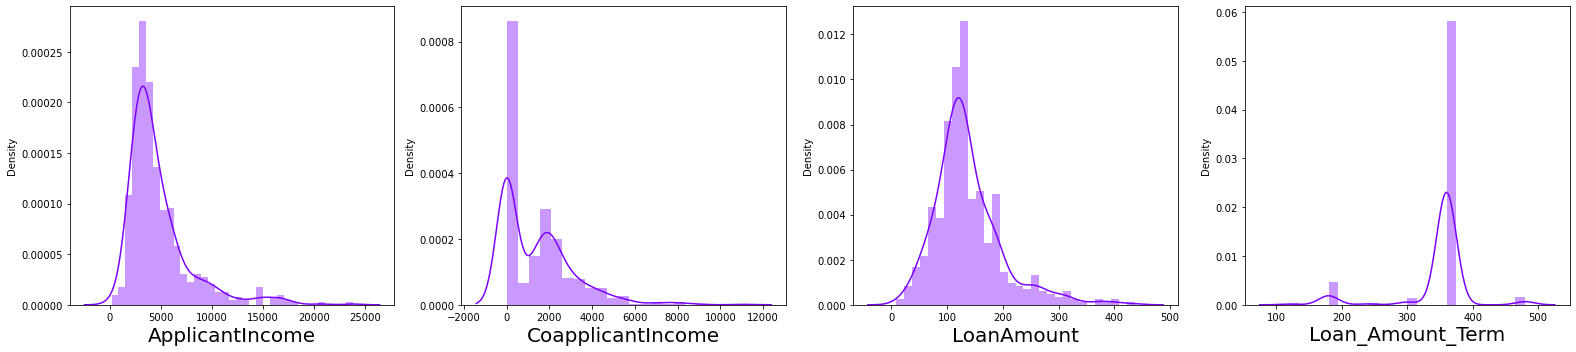

In [91]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.

In [92]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [93]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.651500,-1.113075,-0.004751
1,0.218095,0.754158,-0.004751
2,-0.526687,-1.113075,-1.366594
3,-0.787281,0.902399,-0.149903
4,0.696989,-1.113075,0.218212


In [94]:
df.skew()

Gender              -1.644689
Married             -0.636519
Dependents           1.044111
Education            1.316088
Self_Employed        2.229920
ApplicantIncome      0.016696
CoapplicantIncome   -0.175778
LoanAmount           0.062015
Loan_Amount_Term    -2.157886
Credit_History      -1.998786
Property_Area       -0.051356
Loan_Status         -0.835477
dtype: float64

### Corrleation

In [95]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.377511,0.187968,0.043832,-0.003730,0.065509,0.228483,0.165705,-0.109261,0.015859,-0.027471,0.019898
Married,0.377511,1.000000,0.332919,0.017426,-0.009078,-0.018840,0.333520,0.175862,-0.120762,0.020362,0.008786,0.087282
Dependents,0.187968,0.332919,1.000000,0.063818,0.044987,0.112202,0.005138,0.132600,-0.080395,-0.018479,-0.002816,0.019152
Education,0.043832,0.017426,0.063818,1.000000,-0.011291,-0.179275,0.049233,-0.136085,-0.092479,-0.076160,-0.066682,-0.092012
Self_Employed,-0.003730,-0.009078,0.044987,-0.011291,1.000000,0.206947,-0.094122,0.105006,-0.043867,-0.014069,-0.033643,-0.021305
ApplicantIncome,0.065509,-0.018840,0.112202,-0.179275,0.206947,1.000000,-0.362453,0.465856,-0.042145,0.034455,-0.028338,0.001551
CoapplicantIncome,0.228483,0.333520,0.005138,0.049233,-0.094122,-0.362453,1.000000,0.175430,0.011462,0.003337,-0.066786,0.067858
LoanAmount,0.165705,0.175862,0.132600,-0.136085,0.105006,0.465856,0.175430,1.000000,0.116444,0.000282,-0.112519,-0.024818
Loan_Amount_Term,-0.109261,-0.120762,-0.080395,-0.092479,-0.043867,-0.042145,0.011462,0.116444,1.000000,0.017868,-0.063508,-0.033253
Credit_History,0.015859,0.020362,-0.018479,-0.076160,-0.014069,0.034455,0.003337,0.000282,0.017868,1.000000,-0.009204,0.559962


<AxesSubplot:>

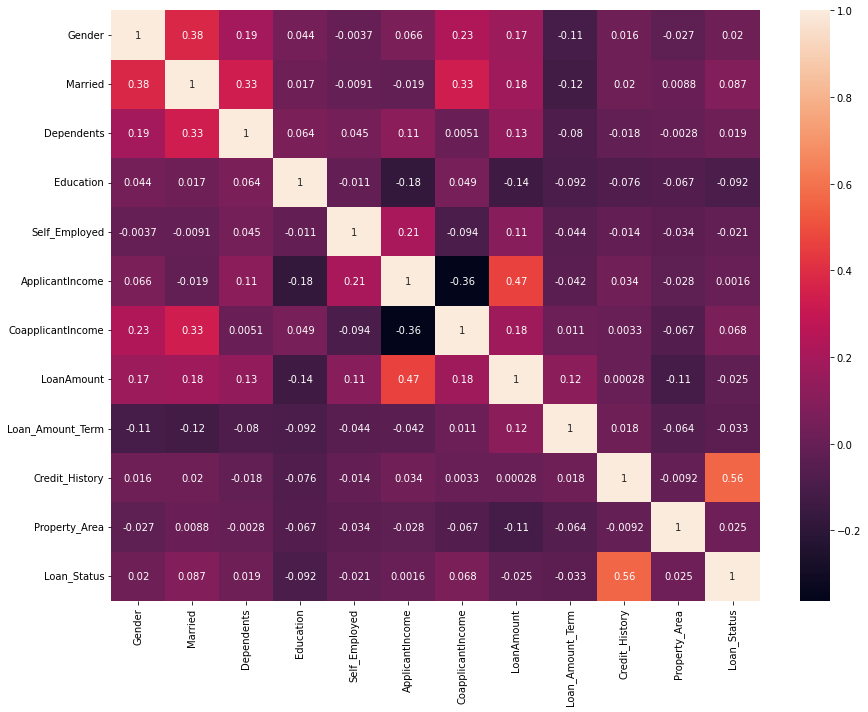

In [96]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

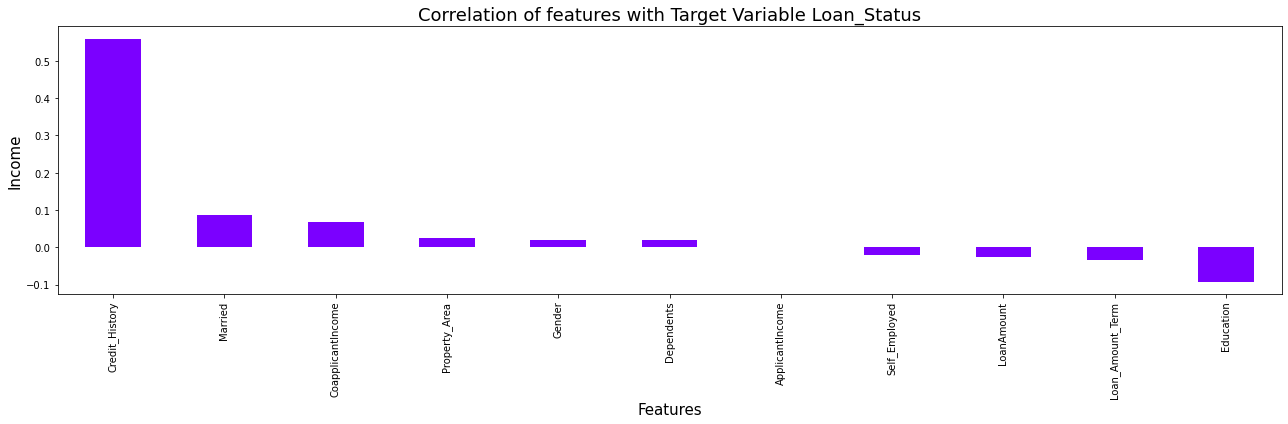

In [98]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

### Checking Multicollinearity

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.136510,Gender
1,3.981112,Married
2,1.784145,Dependents
3,1.353218,Education
4,1.193507,Self_Employed
5,1.836031,ApplicantIncome
6,1.585424,CoapplicantIncome
7,1.606908,LoanAmount
8,10.194387,Loan_Amount_Term
9,9.555762,Credit_History


VIF is within  limit of 10.

### Balanceing Imbalanced data

In [105]:
df.Loan_Status.value_counts()

1    405
0    180
Name: Loan_Status, dtype: int64

In [106]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [107]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [110]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [111]:
Y.value_counts()

1    405
0    405
Name: Loan_Status, dtype: int64

### Standard Scaling

In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Model Building

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Random state

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8395061728395061 on Random_state 114


#### Logistics Regression 

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=114, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 83.9506172839506


Confusion matrix of Logistics Regression : [[48 20]
 [ 6 88]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.89      0.71      0.79        68
           1       0.81      0.94      0.87        94

    accuracy                           0.84       162
   macro avg       0.85      0.82      0.83       162
weighted avg       0.85      0.84      0.84       162



#### DecisionTreeClassifier

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=114, test_size=.2)
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
y_pred=DT.predict(X_test)
print('DecisionTreeClassifier Evaluation')
print('\n')
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of DecisionTreeClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of DecisionTreeClassifier',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 82.71604938271605


Confusion matrix of DecisionTreeClassifier : [[59  9]
 [19 75]]


classification Report of DecisionTreeClassifier               precision    recall  f1-score   support

           0       0.76      0.87      0.81        68
           1       0.89      0.80      0.84        94

    accuracy                           0.83       162
   macro avg       0.82      0.83      0.83       162
weighted avg       0.84      0.83      0.83       162



#### KNeighborsClassifier

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=114, test_size=.2)
KN= KNeighborsClassifier(n_neighbors = 3)
KN.fit(X_train,Y_train)
y_pred=KN.predict(X_test)
print('KNeighborsClassifier Evaluation')
print('\n')
print('Accuracy Score of KNeighborsClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of KNeighborsClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of KNeighborsClassifier',classification_report(Y_test, y_pred))

KNeighborsClassifier Evaluation


Accuracy Score of KNeighborsClassifier : 79.01234567901234


Confusion matrix of KNeighborsClassifier : [[56 12]
 [22 72]]


classification Report of KNeighborsClassifier               precision    recall  f1-score   support

           0       0.72      0.82      0.77        68
           1       0.86      0.77      0.81        94

    accuracy                           0.79       162
   macro avg       0.79      0.79      0.79       162
weighted avg       0.80      0.79      0.79       162



#### RandomForestClassifier

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=114, test_size=.2)
RF=  RandomForestClassifier()
RF.fit(X_train,Y_train)
y_pred=RF.predict(X_test)
print('RandomForestClassifier Evaluation')
print('\n')
print('Accuracy Score of RandomForestClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of RandomForestClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of RandomForestClassifier',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 88.27160493827161


Confusion matrix of RandomForestClassifier : [[61  7]
 [12 82]]


classification Report of RandomForestClassifier               precision    recall  f1-score   support

           0       0.84      0.90      0.87        68
           1       0.92      0.87      0.90        94

    accuracy                           0.88       162
   macro avg       0.88      0.88      0.88       162
weighted avg       0.89      0.88      0.88       162



#### GradientBoostingClassifier

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=114, test_size=.2)
GB=  GradientBoostingClassifier()
GB.fit(X_train,Y_train)
y_pred=GB.predict(X_test)
print('GradientBoostingClassifier Evaluation')
print('\n')
print('Accuracy Score of GradientBoostingClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of GradientBoostingClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report',classification_report(Y_test, y_pred))

GradientBoostingClassifier Evaluation


Accuracy Score of GradientBoostingClassifier : 84.5679012345679


Confusion matrix of GradientBoostingClassifier : [[56 12]
 [13 81]]


classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.82        68
           1       0.87      0.86      0.87        94

    accuracy                           0.85       162
   macro avg       0.84      0.84      0.84       162
weighted avg       0.85      0.85      0.85       162



# CrossValidation 

In [130]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        GradientBoostingClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score:', m)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('*'*50)



Cross Validation Score: LogisticRegression()
Score : [0.68518519 0.7037037  0.68518519 0.78395062 0.77160494]
Mean Score : 0.7259259259259259
Std deviation : 0.04305085376336466


**************************************************


Cross Validation Score: DecisionTreeClassifier()
Score : [0.74074074 0.75308642 0.7654321  0.78395062 0.79012346]
Mean Score : 0.7666666666666666
Std deviation : 0.018477320428513296


**************************************************


Cross Validation Score: KNeighborsClassifier(n_neighbors=3)
Score : [0.72839506 0.71604938 0.72222222 0.72222222 0.74691358]
Mean Score : 0.7271604938271604
Std deviation : 0.010620154650669915


**************************************************


Cross Validation Score: RandomForestClassifier()
Score : [0.77160494 0.7962963  0.80864198 0.80864198 0.88888889]
Mean Score : 0.8148148148148149
Std deviation : 0.03942893684610199


**************************************************


Cross Validation Score: GradientBoostingC

RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score

# Hyper Parameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

In [155]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [156]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [157]:
 GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 60}

In [164]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=40 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred)*100)

Accuracy Score : 88.27160493827161


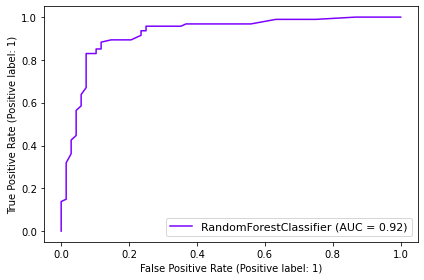

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8826658322903629


In [166]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [167]:
import joblib
joblib.dump(Final_mod,'Loan_Status.pkl')

['Loan_Status.pkl']